[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
======

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## File descriptions

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
## Data fields

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review

## Objective
Objective of this dataset is base on **review** we predict **sentiment** (positive or negative) so X is **review** column and y is **sentiment** column

## 1. Load Dataset
we only forcus on "labeledTrainData.csv" file

Let's first of all have a look at the data.

[Click here to download dataset](https://s3-ap-southeast-1.amazonaws.com/ml101-khanhnguyen/week3/assignment/labeledTrainData.tsv)

In [3]:
# Import pandas, numpy
import numpy as np
import pandas as pd

In [4]:
# Read dataset with extra params sep='\t', encoding="latin-1"
data = pd.read_csv('./labeledTrainData.tsv',sep='\t', encoding="latin-1")

In [5]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


## 2. Preprocessing

In [16]:
# stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trangnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Removing special characters and "trash"
import re
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text

In [13]:
# tokenizer and stemming
# tokenizer: to break down our twits in individual words
# stemming: reducing a word to its root
from nltk.stem import PorterStemmer

porter = PorterStemmer()
def tokenizer_porter(text):
    token = [porter.stem(word) for word in text.split()]
    return token

In [14]:
tokenizer_porter('With all this stuff going down at the moment')

['with', 'all', 'thi', 'stuff', 'go', 'down', 'at', 'the', 'moment']

In [15]:
# split the dataset in train and test
# Your code here
X = data['review']
y = data['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


## 3. Create Model and Train 

Using **Pipeline** to concat **tfidf** step and **LogisticRegression** step

In [28]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

tfidf = TfidfVectorizer(stop_words=stop, preprocessor=preprocessor, tokenizer=tokenizer_porter) # Your code here

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function prepr...e, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

## 4. Evaluate Model

In [30]:
# Using Test dataset to evaluate model
# classification_report
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

prediction = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy: 0.88704
[[2753  414]
 [ 292 2791]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3167
           1       0.87      0.91      0.89      3083

   micro avg       0.89      0.89      0.89      6250
   macro avg       0.89      0.89      0.89      6250
weighted avg       0.89      0.89      0.89      6250



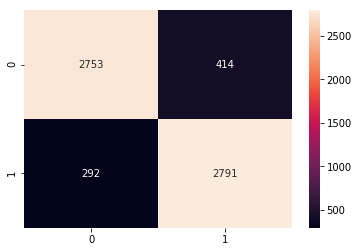

In [39]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d')

In [49]:
wrong_label = y_test[y_test != prediction]

In [48]:
wrong_df = pd.DataFrame(X_test[y_test != prediction])

In [50]:
wrong_df['true_label'] = wrong_label

In [54]:
wrong_df.head()

,review,true_label
11353,In the process of trying to establish the audi...,1
6079,Here is the explanation screenwriter Pamela Ka...,1
6638,The Lady in Cement is a veritable course on so...,0
21316,The problem is the role of the characters in t...,0
1279,This is a typical Steele novel production in t...,0


In [56]:
wrong_df['review'].iloc[0]

"In the process of trying to establish the audiences' empathy with Jake Roedel (Tobey Maguire) the filmmakers slander the North and the Jayhawkers. Missouri never withdrew from the Union and the Union Army was not an invading force. The Southerners fought for State's Rights: the right to own slaves, elect crooked legislatures and judges, and employ a political spoils system. There's nothing noble in that. The Missourians could have easily traveled east and joined the Confederate Army.<br /><br />It seems to me that the story has nothing to do with ambiguity. When Jake leaves the Bushwhackers, it's not because he saw error in his way, he certainly doesn't give himself over to the virtue of the cause of abolition."

## 5. Export Model 

In [9]:
# Using pickle to export our trained model
import pickle
import os